# 用蒙特卡罗模拟法来看你的退休计划 💵💵

## 背景

有非常多的人对接下来的方法来策划他们的退休计划，先投资一笔钱，再每月定期定额投资，主要投资于股票市场 📈📈📈.

这个方法也被许多投资大佬所推崇，这就是所谓的“被动投资”。顾名思义就是不要去猜测市场高低位，有几率地定期定额的投资于股票市场。

我个人也是实行这个做法 🥚🥚。身为一名工程师，做任何决定前我都喜欢参考真实的数据，所以决定用蒙特卡洛模拟法的角度来分析这个做法。

## Dow Jones 指数的历史回酬

我选了Dow Jones指数来做分析，因为本人主要投资🇺🇸 🇺🇸美国市场，Dow Jones是美国股票市场的主要指数。

话不多说，先来点分析。

---

### 用 Pandas 模块来读取数据 🐼🐼

我用的是1915年到2021年的数据。

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.style.use('seaborn')

DJI = pd.read_csv('DJI.csv')
DJI.head()

,Year,Open,High,Low,Close,Adj. Close,Return
0,2021,"30,909.43","30,223.89","31,188.38","30,223.89","31,176.01",0.02
1,2020,"26,890.67","28,868.80","30,606.48","18,591.93","30,606.48",0.07
2,2019,"26,379.55","23,346.24","28,645.26","22,686.22","28,538.44",0.22
3,2018,"25,046.86","24,824.01","26,828.39","21,792.20","23,327.46",-0.06
4,2017,"21,750.20","19,881.76","24,837.51","19,732.40","24,719.22",0.25


### 一些统计学的分析 🧮

对于正态分布来说，95%的数据都会在2个标准差内。

虽然Dow Jones的历史回酬不是完美的正态分布，可是还是可以接受的。

正态分布的弱点就是忽略的**黑天鹅**的存在，这里就不多加讨论黑天鹅事件了。

![bomb](stdev.png)

In [2]:
mean = DJI['Return'].mean()
std = DJI['Return'].std()
lowerbound = mean - 2*std
upperbound = mean + 2*std

print("Mean return        : {:.2f}".format(mean))
print("Standard Deviation : {:.2f}".format(std))

Mean return        : 0.08
Standard Deviation : 0.21


### Dow Jones 历史回酬的分布

从数据我们算得平均数(mean)于标准差(standard deviation)。为了更好的可视化，把它画在图表上。

从图表来看，它的分布是接近于正态分布的。**95% 的回酬都在 -33% 至 +49% 内。**

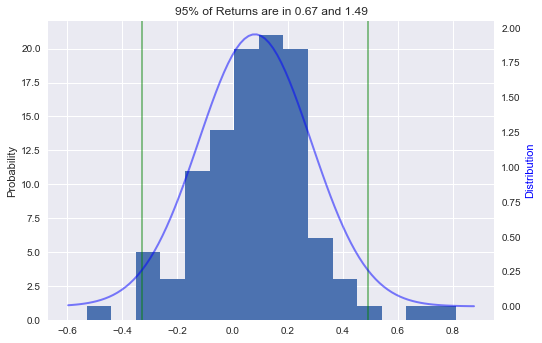

In [3]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

plt.axvline(x = upperbound, color='g', linestyle='-', alpha=0.5, label = 'mean')
plt.axvline(x = lowerbound, color='g', linestyle='-', alpha=0.5, label = 'mean')

#---------Histogram------------------------------------------------------------------------------------
title = str('95% of Returns are in {:.2f}'.format(1 + lowerbound) + ' and {:.2f}'.format(1 + upperbound))
DJI['Return'].hist(bins=15, ax = ax1)
ax1.set_ylabel('Probability')

#---------Fitting the histogram with curve-------------------------------------------------------------
mu, std = norm.fit(DJI['Return'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
ax2.plot(x, p, 'b', linewidth=2, alpha = 0.5)
ax2.grid(False)
ax2.set_ylabel('Distribution', color='b')

#--------Show the plot
plt.title(title)
plt.show()

### 考存钱投资能成为百万富翁吗？ 💰💰💰

我们来做个分析，假设一个人初始投资RM5000, 并每月定期定额投资RM400。

靠存钱的话他会存到**RM168,200**.

Final value : 168200.00


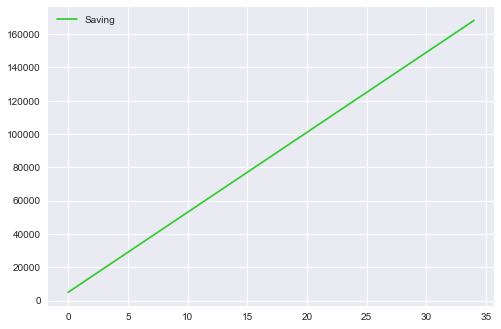

In [4]:
#-----Constants-----------------------
INITIAL_INVESTMENT = 5000
MONTHLY_TOPUP = 400
YEARLY = MONTHLY_TOPUP * 12
# ------------------------------------

saving = [INITIAL_INVESTMENT]

for i in range(1, 35):
    saving.append((saving[i - 1]) + YEARLY)

capital = pd.DataFrame(saving, columns=['Saving'])

#------Plotting the savings growth------
capital.plot(y='Saving', color='limegreen', alpha = 1)
print('Final value : {:.2f}'.format(capital['Saving'].iloc[ -1]))

### 蒙特卡罗模拟法

**RM168,200** 在30年后可能有点少，如果加上投资呢？

股票市场的回酬波动大而且不确定性高，不过对于刚刚我们已经有了一定的分析，**95% 的回酬是在 -33% 至 +49% 内的。**

利用蒙特卡罗模拟法，我模拟了50次不同的结果。

这就像是**奇特博士**在**复3**里做的事一样, 差别在于我用程序来模拟。

![bomb](meme.jpg)

最后我会用各个结果的中位数来做比较。中位数比平均数更能表现出真实的表现，因为中位数较不受极端数位影响。

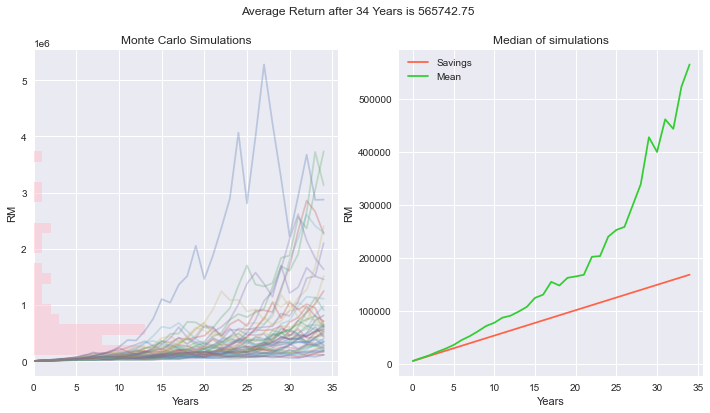

In [5]:
from random import randrange

#-----Using upperbound and lowerbound of historical returns-------
RAND_TOP = 149
RAND_BOT = 68
YEAR = 34

#------Generate 50 simulations------------------------------------
for k in range(1, 50):
    capital[str('Capital' + str(k))] = capital['Saving']
    for i in range(1, len(capital)):
        capital.loc[i, str('Capital' + str(k))] = (capital.loc[i - 1, str('Capital' + str(k))] + YEARLY) * float(
            randrange(RAND_BOT, RAND_TOP) / 100)

capital['Mean'] = capital.median(axis=1)

fig = plt.figure(figsize=(12, 6))
fig.suptitle(('Average Return after ' + str(YEAR) + ' Years is %.2f' % capital['Mean'][capital.index[YEAR]]))
ax = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

capital.plot(legend=None,alpha=0.3, title = 'Monte Carlo Simulations', xlabel = 'Years', ylabel = 'RM', ax = ax)
capital.iloc[-1].hist(bins=20, orientation="horizontal", color="pink", alpha=0.5,ax = ax)

capital.plot(y='Saving', color = 'tomato', alpha = 1, label="Savings", xlabel = 'Years', ylabel = 'RM', title = 'Median of simulations', ax = ax2)
capital.plot(y='Mean', color='limegreen', alpha = 1, ax = ax2)

plt.show()

### 笔记 ⚡⚡

这模拟每次运行都会产生不同的答案，因为有程序里加了随机的因素。

或许在几个模拟中你会成为百万富翁，根据中位数来看，最可能的结果是你将得到 **RM500,000** 的净值。（也不错?)

想要成为百万富翁，迎娶白富美，走上人生巅峰的话，看来你得更努力存钱投资了。